# Business Insights + Retention Strategy + Dashboard Plan


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("C:/Users/user/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [2]:
# Churn Rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100   #value_counts() how many "Yes" and "No" entries are in the churn column
print(churn_rate)                                             #normalize=True converts those counts to proportions(% format after * by 100)
         


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


# Churn Rate Overview
- The churn rate is around 26%, meaning about 1 in 4 customers leave.
- This poses a serious risk to revenue and growth.

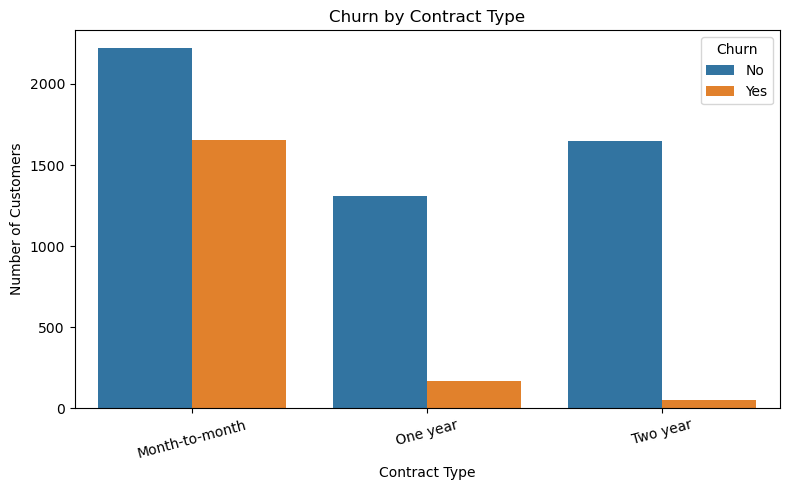

In [3]:
# Churn by Contract Type
plt.figure(figsize=(8,5)) #Set the size of the plot
sns.countplot(data=df, x='Contract', hue='Churn') # Create a grouped bar plot by "Contract" with separate bars for'Churn'.
plt.title("Churn by Contract Type") #Set the plot title
plt.xlabel("Contract Type")         # Label for x- axis
plt.ylabel("Number of Customers")   # Label for y-axis
plt.xticks(rotation=15)             # Rotate x axis for better visibility
plt.tight_layout()                  #Adjust layout to prevent clipping 
plt.show()                          # Display the plot

# Churn by Contract Type

- Majority of churn comes from Month-to-month users.
- Customers on 1 or 2-year contracts churn much less.


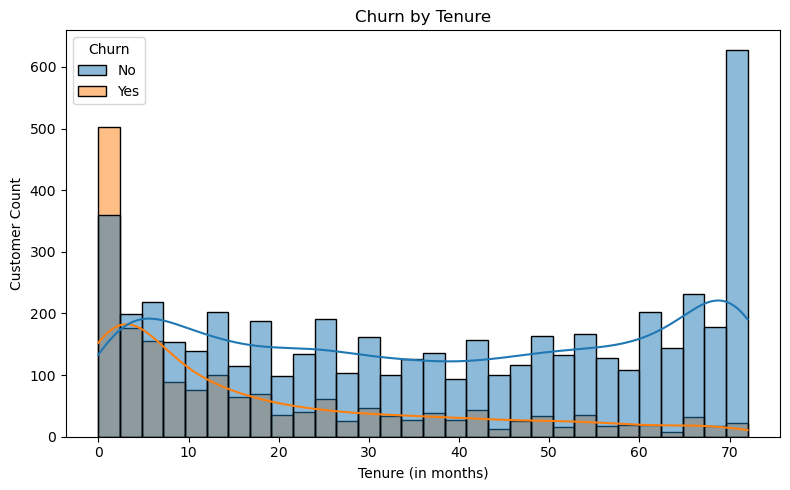

In [4]:
# Churn by Tenure
plt.figure(figsize=(8,5))   # Set size of the plot
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)   # Histogram of 'tenure' split by 'Churn'
plt.title("Churn by Tenure")       # Title of the chart
plt.xlabel("Tenure (in months)")   # X-axis label
plt.ylabel("Customer Count")       # Y-axis label
plt.tight_layout()                 # Prevent clipping 
plt.show()                         # Display the chart


# Churn by Tenure

- Customers with tenure < 10 months churn more.
- Indicates a gap in early experience onboarding.


In [7]:
# Convert 'Churn' column to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop customerID if it's in your data
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Split into features and label
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

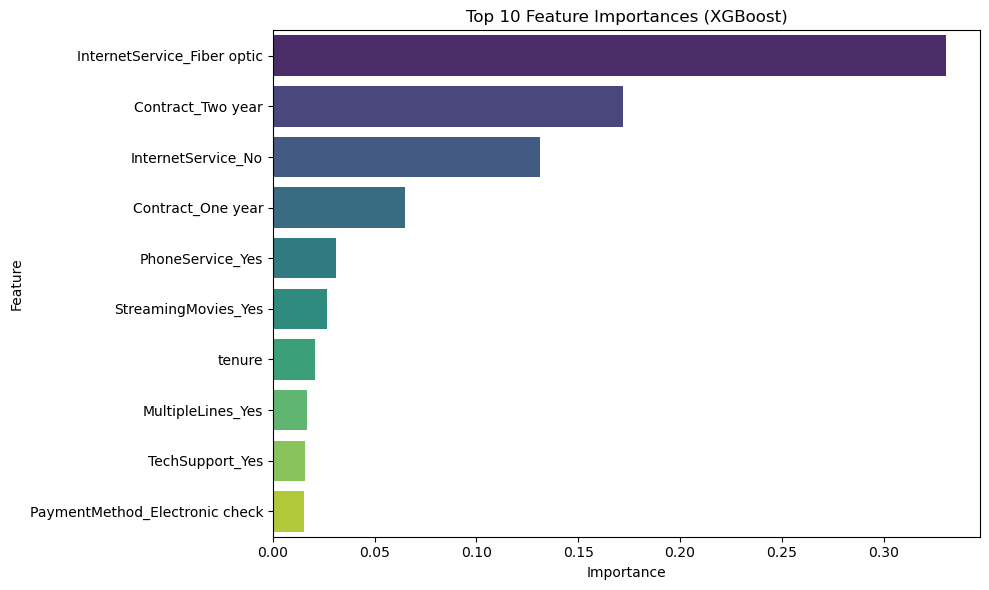

In [9]:
importances = xgb_model.feature_importances_
features = X_train.columns

fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=fi_df.head(10), y='Feature', x='Importance', palette='viridis')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


# Top Drivers of Churn

- Tenure, monthly Charges, contract type, and Tech support are most influential.
- These features directly impact customer satisfaction and cost.

##  Retention Strategy (Business Recommendations)

Based on the churn data and model results, here are 5 actionable retention strategies:

1. Offer Discounts on Long-Term Contracts
   - Month-to-month users have the highest churn rate.
   - Introduce special pricing for annual or two-year plans.

2. Improve Early Onboarding Experience
   - Most customers who churn have tenure less than 10 months.
   - Design onboarding emails, check-ins, and offers during first 3 months.

3. Add Free Tech Support
   - Customers without tech support churn significantly more.
   - Bundle basic support into all internet plans.

4. Engage High-Charge Users
   - High monthly charges → more churn.
   - Offer loyalty rewards, premium support, or discounts to these users.

5. Set Up Exit Surveys & Winback Campaigns
   - Ask churning users why they left.
   - Send them winback email campaigns with personalized offers.


In [ ]:
# Power BI Dashboard Plan

# 1. Top Metrics:
- Total Customers
- Total Churned
- Monthly Revenue Loss (from churn)
- Average Tenure

# 2. Visuals:
- Bar Chart: Churn by Contract Type
- Histogram: Churn by Tenure
- Pie Chart: Churn by Internet Service
- Heatmap: Monthly Charges vs Churn

# 3. Filters:
- Gender
- Senior Citizen
- Internet Service
- Contract


In [11]:
import os
os.makedirs("images", exist_ok=True)


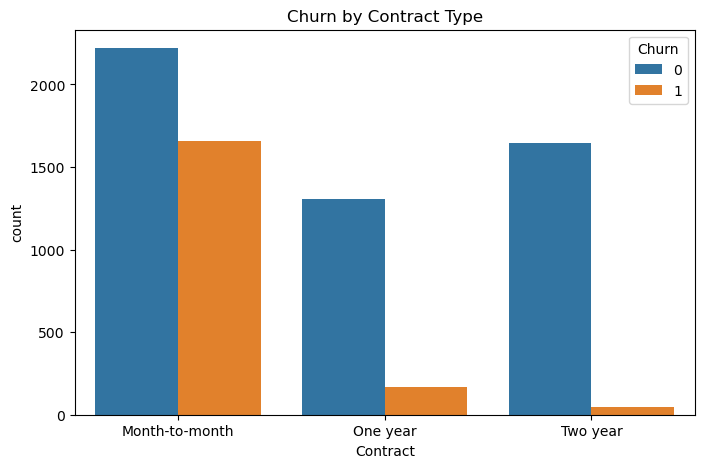

In [12]:
import os
os.makedirs("images", exist_ok=True)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.savefig("images/churn_by_contract.png")
plt.show()


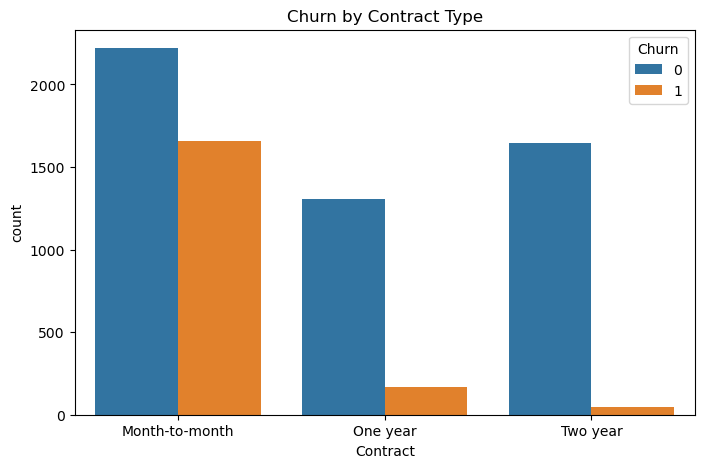

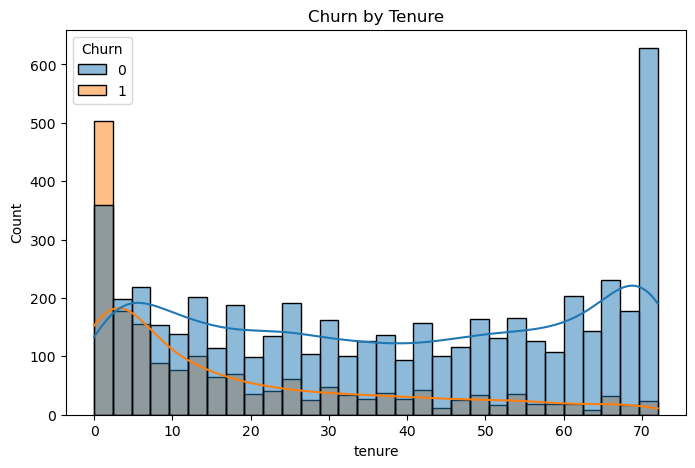

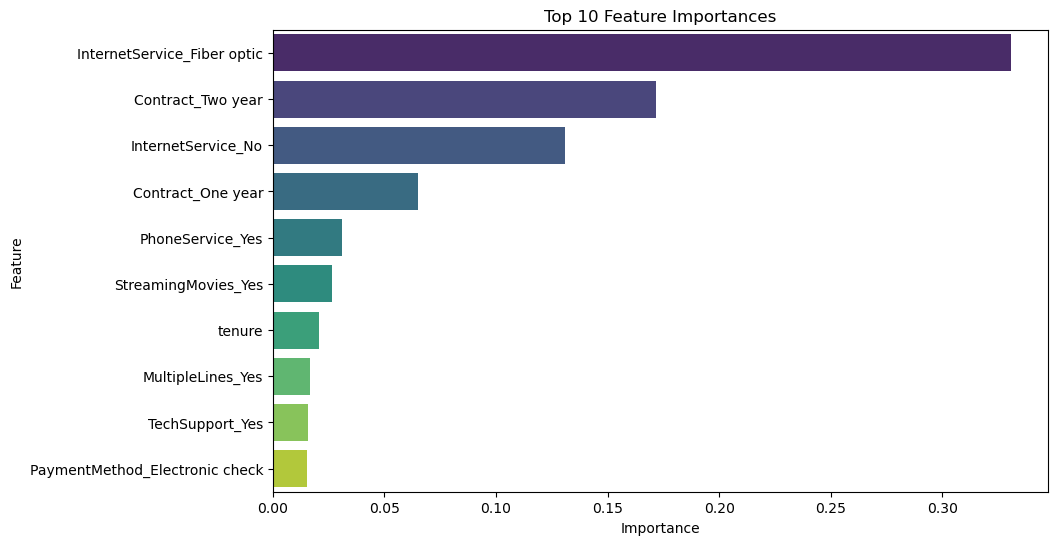

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.savefig("images/churn_by_contract.png")

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Churn by Tenure")
plt.savefig("images/churn_by_tenure.png")

plt.figure(figsize=(10,6))
sns.barplot(data=fi_df.head(10), y='Feature', x='Importance', palette='viridis')
plt.title("Top 10 Feature Importances")
plt.savefig("images/feature_importance.png")


# Business Insights Summary:
Senior Citizens have high churn → offer customized support

Month-to-month contracts → target with discounts to shift to yearly

Low tenure customers → set up welcome/onboarding emails

Fiber optic internet users → handle service complaints faster

➤ Retention Strategy Dashboard Layout Plan:
KPI Cards: Total Customers, Churn Rate, Senior Citizen Churn

Charts: Churn vs Tenure, Churn by Contract Type

Filters: Gender, Internet Service Type, Payment Method